In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import math
import localizer_functions as lf # custom stuff
import sys

now we are using all those images to do our analysis

6


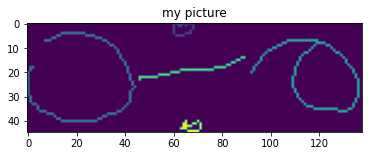

In [2]:
#src = cv2.imread('../images_no_copies/div/div_665.jpg')
src = cv2.imread('../generated_images/0div0/8.png')
num_labels, labels, stats, centroids = lf.prepare_image(src)

print(num_labels)
plt.imshow(labels)
plt.title("my picture")
plt.show()

show the upper left corner of every detected component

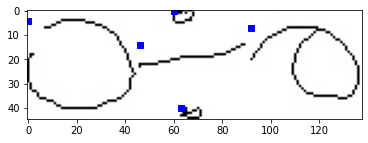

In [3]:
plt.imshow(src)
for i in range(1, num_labels):
    # get stats for i-th number by using stats[i, PROPERTY]
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    plt.plot(left, top, 'bs')
    #print(left, top)
plt.show()

overlaps is a list of tuples, with each tuple being (i, list) where the list is a list of digits which start within the x range of the i-th digit

In [4]:
division_symbols_pairs, digit_indices = lf.split_division_rest(num_labels, stats)

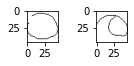

In [5]:
# print all digits
digits = []
for i in digit_indices:
    number = lf.extract_number(stats, src, i)
    squared = lf.make_square_out_of(number)
    digits.append(squared)
    num = plt.subplot(6,5,i)
    #cv2.imwrite(str(i) + "-sq.jpg", squared)
    num.imshow(squared)
plt.show()

In [6]:
div_sym = lf.get_division_symbols(division_symbols_pairs, stats, src)
#print(div_sym[0][1])
all_symbols = digits + [div_sym[x][1] for x in range(0, len(div_sym))]
#all_symbols.append(digits)
#all_symbols.append(division_symbols)
print(len(all_symbols))
print(len(digits))
plt.show()

3
2


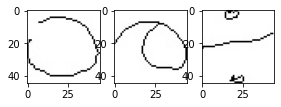

In [7]:
i = 1
for img in all_symbols:
    num = plt.subplot(1,4,i)
    i = i + 1
    
    cv2.imwrite( f"{i}.png", img)
    num.imshow(img)
plt.show()

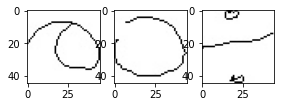

In [6]:
symbols = lf.parse_equation(src)
#print(symbols)
i = 1
for img in symbols:
    num = plt.subplot(1,4,i)
    i = i + 1
    
    #cv2.imwrite( f"{i}.png", img)
    num.imshow(img)
plt.show()

In [9]:
equations = lf.get_all_data_cv('../generated_images')

from IPython.core.debugger import set_trace

print(len(equations))
count = 0
err_cnt = 0
for equ_type in equations: #[equations[x] for x in equations]:
    #print(equ_type)
    for i, equ in enumerate(equations[equ_type]):
        count += 1
        all_symbols = lf.parse_equation(equ)
        if len(all_symbols) != 3:
            err_cnt += 1
            print(f"{len(all_symbols)} is the length of all symbols, name {equ_type}/{i}")
            path = f"errs/{equ_type}/{i}/"
            if not os.path.exists(path): 
                os.makedirs(path)
            for j in range(0, len(all_symbols)):
                cv2.imwrite(f"errs/{equ_type}/{i}/{j}.png", all_symbols[j][1])
        
print(count)
print(err_cnt)


Test
400
4 is the length of all symbols, name 4-0/9
4 is the length of all symbols, name 0+0/4
4 is the length of all symbols, name 0div5/1
5 is the length of all symbols, name 0div5/2
4 is the length of all symbols, name 0div5/3
5 is the length of all symbols, name 0div5/6
4 is the length of all symbols, name 0div5/7
4 is the length of all symbols, name 0div5/9
4 is the length of all symbols, name 8div1/4
4 is the length of all symbols, name 8div1/5
4 is the length of all symbols, name 7times7/7
4 is the length of all symbols, name 1div6/0
4 is the length of all symbols, name 1div6/4
4 is the length of all symbols, name 1div6/7
4 is the length of all symbols, name 1div6/8
4 is the length of all symbols, name 1div6/9
4 is the length of all symbols, name 2div3/2
4 is the length of all symbols, name 2div3/8
4 is the length of all symbols, name 3div8/0
4 is the length of all symbols, name 3div8/6
4 is the length of all symbols, name 3div8/8
4 is the length of all symbols, name 0div7/0
4 i

In [2]:
i = 1
for (_, img) in all_symbols:
    num = plt.subplot(4,4,i)
    cv2.imwrite( f"{i}.png", img)
    i = i + 1
    
    num.imshow(img)
plt.show()

NameError: name 'all_symbols' is not defined

In [3]:
i = 1
for (_, img) in sorted_symbols:
    num = plt.subplot(4,4,i)
    cv2.imwrite( f"{i}.png", img)
    i = i + 1
    
    num.imshow(img)
plt.show()

NameError: name 'sorted_symbols' is not defined